# Imputating missing data 

## Libraries

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer,KNNImputer

## Loading and cleaning the data

In [135]:
df = pd.read_csv("penguins_lter.csv")

In [136]:
df = df.loc[:,df.columns.isin(["Sex","Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"])]

In [137]:
df.columns = [x.replace(" ","_").replace("(","").replace(")","").lower() for x in df.columns]

In [138]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [139]:
df.isna().sum().sort_values(ascending=False)

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
dtype: int64

<AxesSubplot: >

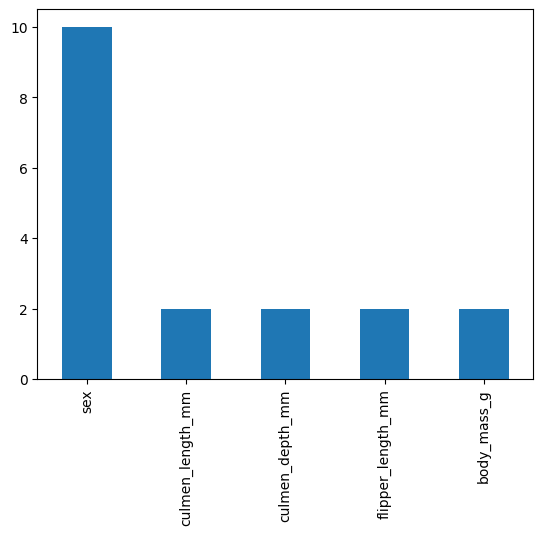

In [140]:
df.isna().sum().sort_values(ascending=False).plot(kind="bar")

## Imputation
### Mean imputation
#### It simply takes the mean of the variable with missing data and replaces the NA's with the calculated mean

In [141]:
numeric_cols = df.select_dtypes(np.number).columns
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [142]:
df.isna().sum().sort_values(ascending=False)

sex                  10
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
dtype: int64

In [143]:
df = pd.read_csv("penguins_lter.csv")
df = df.loc[:,df.columns.isin(["Sex","Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"])]

In [144]:
df.isna().sum().sort_values(ascending=False)

Sex                    10
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
dtype: int64

### kNN imputation
#### The algorithm takes n-closest neighbors for each row (sample) where there is missing data and then takes the average value based on the values from this column from selected neighbors

In [145]:
numeric_cols = df.select_dtypes(np.number).columns

knn_imp = KNNImputer(n_neighbors=5)
imputed_num_data = knn_imp.fit_transform(df[numeric_cols])

df[numeric_cols] = imputed_num_data

In [146]:
df.isna().sum().sort_values(ascending=False)

Sex                    10
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
dtype: int64

### Imputating categorical variable with its mode

In [147]:
object_cols = df.select_dtypes("object").columns
object_imputer = SimpleImputer(strategy="most_frequent")
df[object_cols] = object_imputer.fit_transform(df[object_cols])

In [148]:
df.isna().sum().sort_values(ascending=False)

Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64